# Exponential Mechanism

## Libraries

In [5]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import laplace
from collections import Counter

## Contextualization

In [2]:
"""
-------------
| Dataset X |
----------------------------
| User         Income ($)  |
----------------------------
| Andrew       600         |
| Bob          690         |
| Carly        100         |
| Dean         130         |
| Ernest       400         |
| Florence     570         |
----------------------------

Assume the function F as a categorical query, where:

F = the user with the highest income

Then, F(X) = Bob

However, we must define a utility function U before being able to answer the query F
trough the Exponential Mechanism

Assume the utility function U:

U = length(user) * income

For clarity:
U(X, Andrew)   = 6 * 600 = 3600
U(X, Bob)      = 3 * 690 = 2070
U(X, Carly)    = 5 * 100 = 500
U(X, Dean)     = 4 * 130 = 520
U(X, Ernest)   = 6 * 400 = 2400
U(X, Florence) = 8 * 570 = 4560

Now, we must discover the sensitivity of the utility function

The neighboring Dataset Y can be generated either from:
    1. Dataset X added in another user such {Gary:income} or {Harry:income}
    2. Dataset X removed in one existing user such {Andrew:income} or {Bob:income}
    3. Dataset X modified in one existing user such {Andrew:income} to {Andrew:new_income} or
    {Andrew:income} to {Andy:income}

Since we do not have control over cases 1 and 3, we will consider only the case 2 for generating the neighboring datasets

Then, six possible neighbor datasets Y can be generated:
X - {Andrew}
X - {Bob}
...
And so on

The sensitivity Delta_U is reached when the user Florence is removed from the dataset X, thus:

Delta_U = 4560
"""

# Response of function F applied to dataset X
fx = "Bob"

# Array of users
users = ["Andrew", "Bob", "Carly", "Dean", "Ernest", "Florence"]

# Array of utility scores
scores = [3600, 2070, 500, 520, 2400, 4560]

# Sensitivity of the utility function U
delta_u = 4560

# Standard epsilon values in order of magnitude -- lower to higher
eps = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]

## Graphs

Sensitivity (Utility Function) = 4560

# of Samples = 100000

Eps = 0.01

Probabilities = [0.16690876261270726, 0.16662898594844675, 0.16634238237434357, 0.1663460302736049, 0.16668929024117835, 0.16708454854971927]

Frequancies = Counter({'Florence': 16860, 'Ernest': 16844, 'Dean': 16604, 'Bob': 16599, 'Carly': 16556, 'Andrew': 16537})


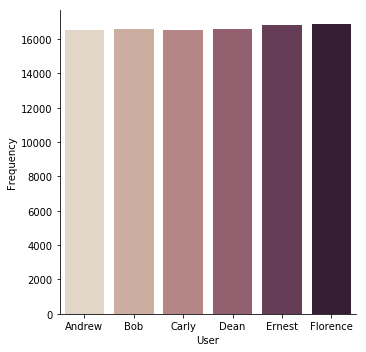


Eps = 0.1

Probabilities = [0.16908326709696792, 0.1662703341129147, 0.1634325014990881, 0.16346834589010553, 0.16687305999067695, 0.1708724914102468]

Frequancies = Counter({'Florence': 17158, 'Andrew': 16893, 'Ernest': 16830, 'Bob': 16523, 'Carly': 16305, 'Dean': 16291})


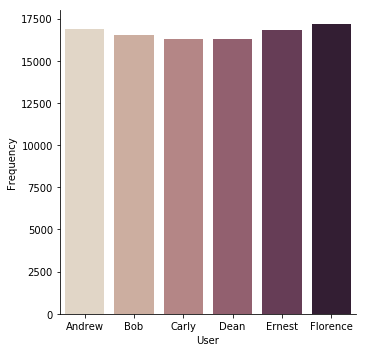


Eps = 0.5

Probabilities = [0.17862761301975635, 0.1642552607412306, 0.15070844225180513, 0.15087378336770627, 0.16725402943095, 0.1882808711885516]

Frequancies = Counter({'Florence': 18726, 'Andrew': 17855, 'Ernest': 16795, 'Bob': 16539, 'Carly': 15123, 'Dean': 14962})


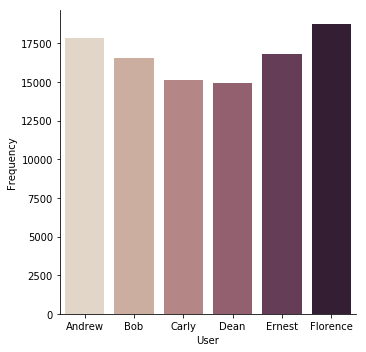


Eps = 1.0

Probabilities = [0.1901684672526977, 0.1607977221896645, 0.13536814519363288, 0.13566533090358543, 0.16672260804114641, 0.21127772641927306]

Frequancies = Counter({'Florence': 21290, 'Andrew': 18971, 'Ernest': 16807, 'Bob': 16102, 'Dean': 13436, 'Carly': 13394})


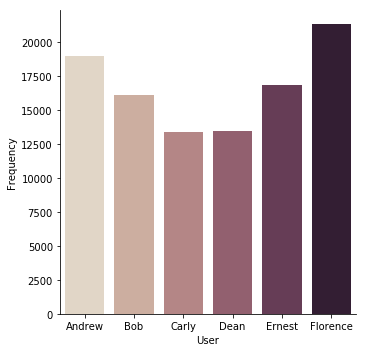


Eps = 2.0

Probabilities = [0.21125798942014712, 0.15104136949733932, 0.10704566550728661, 0.1075161951491773, 0.16237722707524735, 0.26076155335080226]

Frequancies = Counter({'Florence': 26066, 'Andrew': 21005, 'Ernest': 16124, 'Bob': 15266, 'Dean': 10865, 'Carly': 10674})


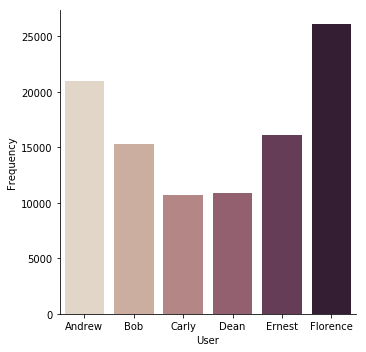


Eps = 3.0

Probabilities = [0.22864992139107565, 0.1382277424664866, 0.08247170494942588, 0.08301607066892107, 0.15407742937430788, 0.31355713114978306]

Frequancies = Counter({'Florence': 31124, 'Andrew': 22988, 'Ernest': 15519, 'Bob': 13742, 'Carly': 8358, 'Dean': 8269})


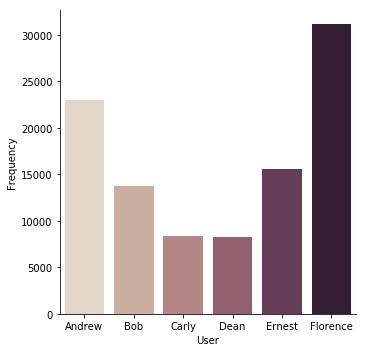

In [3]:
number_of_samples = 100000

print("Sensitivity (Utility Function) = {}\n\n# of Samples = {}".format(delta_u, number_of_samples))

for i_eps in eps:
    print("\nEps = {}".format(i_eps))
    
    probabilities = []

    for j_score in scores:
        probability = math.exp( (i_eps * j_score) / (2 * delta_u) )
        probabilities.append(probability)
    
    probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]
    
    samples = random.choices(population=users, weights=probabilities, k=number_of_samples)
    
    print("\nProbabilities = {}\n\nFrequancies = {}".format(probabilities, Counter(samples)))
    
    df = pd.DataFrame(samples)
    df.columns = ["samples"]

    sns.catplot(x="samples", kind="count", palette="ch:.25", data=df.sort_values("samples"))

    plt.xlabel("User")
    plt.ylabel("Frequency")
    plt.show()

## Naive Execution

In [4]:
number_of_samples = 1

print("Sensitivity (Utility Function) = {}\n\n# of Samples = {}".format(delta_u, number_of_samples))

for i_eps in eps:
    print("\nEps = {}".format(i_eps))
    
    probabilities = []

    for j_score in scores:
        probability = math.exp( (i_eps * j_score) / (2 * delta_u) )
        probabilities.append(probability)
    
    probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]
    
    samples = random.choices(population=users, weights=probabilities, k=number_of_samples)
    
    print("\nF(X) = Bob\nAnonymized F(X) => F'(X) = {}".format(samples[0]))

Sensitivity (Utility Function) = 4560

# of Samples = 1

Eps = 0.01

F(X) = Bob
Anonymized F(X) => F'(X) = Dean

Eps = 0.1

F(X) = Bob
Anonymized F(X) => F'(X) = Andrew

Eps = 0.5

F(X) = Bob
Anonymized F(X) => F'(X) = Ernest

Eps = 1.0

F(X) = Bob
Anonymized F(X) => F'(X) = Ernest

Eps = 2.0

F(X) = Bob
Anonymized F(X) => F'(X) = Bob

Eps = 3.0

F(X) = Bob
Anonymized F(X) => F'(X) = Ernest


## Composite Execution